In [1]:
# Importações

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    LabelEncoder,
)
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold


from src.config import CLEANED_DATA_FILEPATH
from src.graphics import plot_scree_plot

In [2]:
# Obtendo os dados como DataFrame
df = pd.read_parquet(CLEANED_DATA_FILEPATH)
df.head()

,rotulo,FOS_FOS_Variance,FOS_FOS_Median,FOS_FOS_Mode,FOS_FOS_MinimalGrayLevel,FOS_FOS_10Percentile,FOS_FOS_25Percentile,FOS_FOS_75Percentile,FOS_FOS_90Percentile,FOS_FOS_HistogramWidth,...,cor_G_min,cor_G_mediana,cor_B_min,cor_B_mediana,tex_gradiente_std,tex_gradiente_max,tex_laplacian_media,tex_suavidade,comp_variancia_blocos,comp_media_blocos
0,manipulado,310.826241,non_zero,non_zero,non_zero,non_zero,non_zero,non_zero,non_zero,non_zero,...,non_zero,non_zero,non_zero,non_zero,59.640702,813.904171,3.545090,0.996780,9.247067,2.752584
1,manipulado,423.482420,zero,zero,zero,zero,zero,zero,zero,zero,...,zero,zero,zero,zero,85.818398,1001.784408,4.946321,0.997635,13.897900,3.541544
2,manipulado,3412.467306,zero,zero,zero,zero,zero,non_zero,non_zero,non_zero,...,zero,zero,zero,zero,92.008275,1066.317026,5.399804,0.999706,15.709027,4.631431
3,manipulado,372.246170,zero,zero,zero,zero,zero,zero,zero,zero,...,zero,zero,zero,zero,82.538567,982.231134,4.582021,0.997310,13.599282,3.397348
4,manipulado,3414.554278,zero,zero,zero,zero,zero,non_zero,non_zero,non_zero,...,zero,zero,zero,zero,94.192267,1067.064197,5.576363,0.999706,16.027229,4.811873


In [3]:
# Resumo da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rotulo                    194 non-null    object 
 1   FOS_FOS_Variance          194 non-null    float64
 2   FOS_FOS_Median            194 non-null    object 
 3   FOS_FOS_Mode              194 non-null    object 
 4   FOS_FOS_MinimalGrayLevel  194 non-null    object 
 5   FOS_FOS_10Percentile      194 non-null    object 
 6   FOS_FOS_25Percentile      194 non-null    object 
 7   FOS_FOS_75Percentile      194 non-null    object 
 8   FOS_FOS_90Percentile      194 non-null    object 
 9   FOS_FOS_HistogramWidth    194 non-null    object 
 10  GLCM_GLCM_ASM_Mean        194 non-null    float64
 11  cor_R_mediana             194 non-null    object 
 12  cor_G_min                 194 non-null    object 
 13  cor_G_mediana             194 non-null    object 
 14  cor_B_min 

In [4]:
# Separação de X e y

X = df.drop("rotulo", axis=1)
y = df["rotulo"]

In [5]:
# Codifição de y para numérico

le = LabelEncoder()
y = le.fit_transform(y)

y[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
# Fixando uma seed de aleatoriedade
RANDOM_STATE = 42

In [7]:
# Definição do validador cruzado
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

In [8]:
# Definição das transformações no preprocessamento de cada coluna

std_columns = df.select_dtypes("number").columns.to_list()

target_column = ["rotulo"]

ohe_columns = df.columns.difference(std_columns + target_column).to_list()

In [9]:
# Definição do preprocessamento

preprocessing = ColumnTransformer(
    [
        ("std", StandardScaler(), std_columns),
        ("ohe", OneHotEncoder(drop="first"), ohe_columns),
    ]
)

In [10]:
# Definição do pipeline e treino

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("pca", PCA())
    ]
)

pipeline.fit(X, y)

,steps,"[('preprocessing', ...), ('pca', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('std', ...), ('ohe', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [11]:
pipeline["pca"].explained_variance_ratio_

array([7.70675980e-01, 2.08609920e-01, 1.68949022e-02, 1.69245555e-03,
       8.10143876e-04, 6.91898283e-04, 4.59344831e-04, 1.09756517e-04,
       4.78066408e-05, 7.45834461e-06, 3.34192683e-07, 1.73798727e-33,
       2.96578718e-37, 2.23196836e-37, 8.06467725e-38, 4.52549776e-39,
       1.93937947e-39, 3.01151659e-67, 1.30210106e-70, 6.41300401e-71,
       3.30264313e-72])

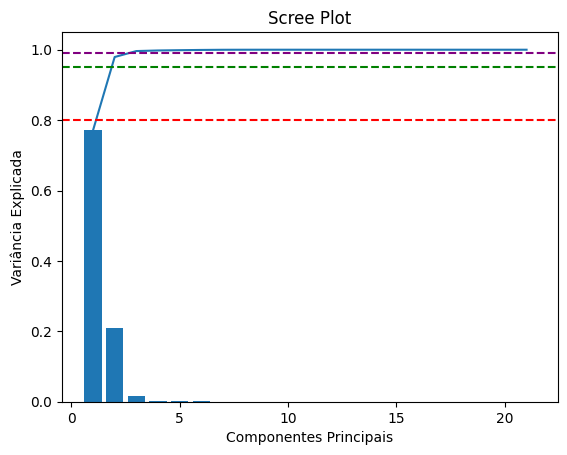

In [12]:
# Scree plot
plot_scree_plot(pipeline)